In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [178]:
df = pd.read_csv("Jeans.csv")

In [179]:
df.info()
print("Dimensions:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 6 columns):
StoreID      689 non-null int64
Fashion      689 non-null int64
Leisure      689 non-null int64
Stretch      689 non-null int64
Original     689 non-null int64
TotalSold    689 non-null int64
dtypes: int64(6)
memory usage: 32.4 KB
Dimensions: (689, 6)


In [180]:
df.head(4)

,StoreID,Fashion,Leisure,Stretch,Original,TotalSold
0,1,182,1528,496,2203,4409
1,2,129,2247,296,1890,4562
2,3,107,1652,267,2342,4368
3,4,117,1744,419,2119,4399


In [181]:
df = df.drop(["StoreID","TotalSold"], axis=1)
df.head(2)

,Fashion,Leisure,Stretch,Original
0,182,1528,496,2203
1,129,2247,296,1890


In [182]:
# Standardize all variables
# Get column names first
names = df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
df_std = pd.DataFrame(scaled_df, columns=names)

c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [183]:
df_std.head(4)

,Fashion,Leisure,Stretch,Original
0,2.753303,-1.107917,0.245628,1.213521
1,1.127167,0.942939,-0.699835,0.139382
2,0.452167,-0.754223,-0.836927,1.690534
3,0.758985,-0.491805,-0.118375,0.925253


In [184]:
# df_std_nona <- na.omit(df_std)
# nrow(df_std_nona)
df_std_nona = df_std.dropna(how='all')
df_std_nona.shape

(689, 4)

In [185]:
outlier_index = (np.abs(df_std) <= 3).all(axis=1)
df_std_noli = df_std[outlier_index]

In [186]:
df_std_noli.shape


(668, 4)

In [187]:
df_clean = df_std_noli

In [188]:
# USAGE GUIDE

# from sklearn.cluster import KMeans

# # Number of clusters
# kmeans = KMeans(n_clusters=3)
# # Fitting the input data
# kmeans = kmeans.fit(X)
# # Getting the cluster labels
# labels = kmeans.predict(X)
# # Centroid values
# centroids = kmeans.cluster_centers_

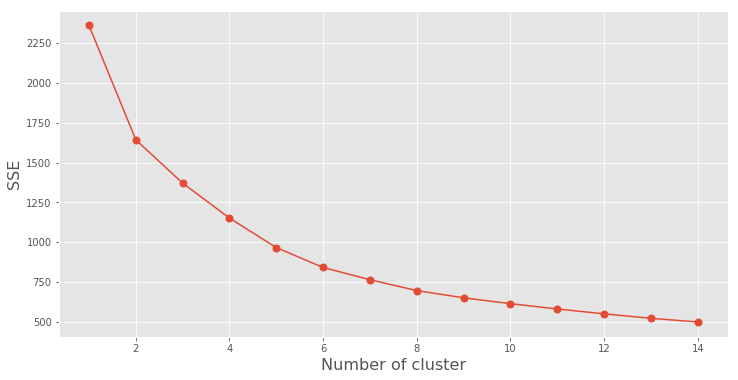

In [189]:
max_clusters = 15 # Set max clusters arbitrarily at 15.

# Find the optimal number of centroids
# Calculate the within groups SSE (Cohesion) for different numbers of cluster solutions
sse = {}
for k in range(1, max_clusters):
    sse[k] = KMeans(n_clusters=k, max_iter=1000).fit(df_clean).inertia_
plt.figure(figsize=(12, 6))
plt.plot(list(sse.keys()), list(sse.values()),marker='.',markersize =14)
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("SSE", fontsize=16)
plt.show()

In [190]:
# The k-means problem - provided by scikit-learn is solved using either Lloyd’s or Elkan’s algorithm.
kmeans = KMeans(n_clusters=6, max_iter=500, n_init=25, random_state=1)
result = kmeans.fit(df_clean)
result

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=25, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [191]:
# Which row/case is belongs to which cluster
cluster_labels = kmeans.predict(df_clean)

In [192]:
# Where the centroids were so that we can see them in the graph
centroids = kmeans.cluster_centers_

In [193]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_clean)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

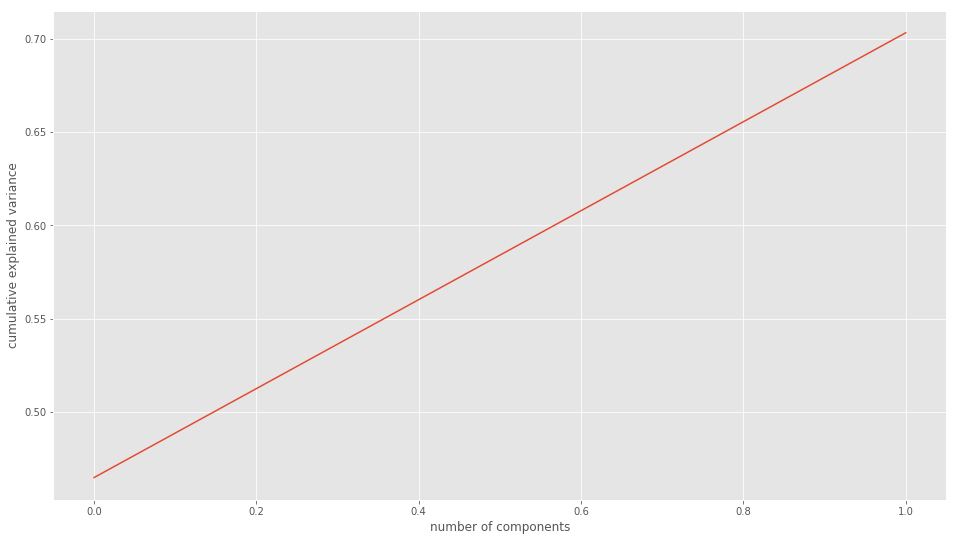

In [194]:
pca.fit(df_clean)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [195]:
# Correlation between principal components and the underlying features (varibl)
pd.DataFrame(pca.components_,columns=df_clean.columns,index = ['PC-1','PC-2'])

,Fashion,Leisure,Stretch,Original
PC-1,-0.081118,0.658987,-0.379020,-0.644593
PC-2,0.784823,-0.032204,-0.581979,0.210514


In [196]:
principalDf = pd.DataFrame(data = pca.fit_transform(df_clean)
             , columns = ['PC1', 'PC2']);
df_clean.shape

(668, 4)

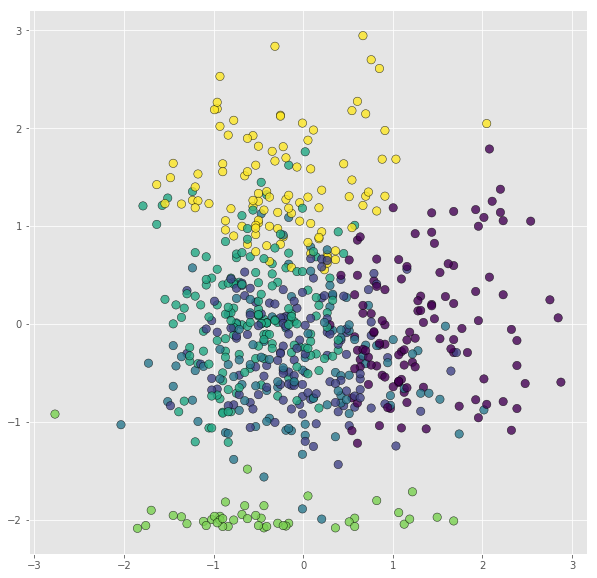

In [197]:
fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.scatter(df_clean['Fashion'], df_clean['Stretch'], c=cluster_labels, alpha=0.8, edgecolor='k', s=70, marker="o", )
plt.show()

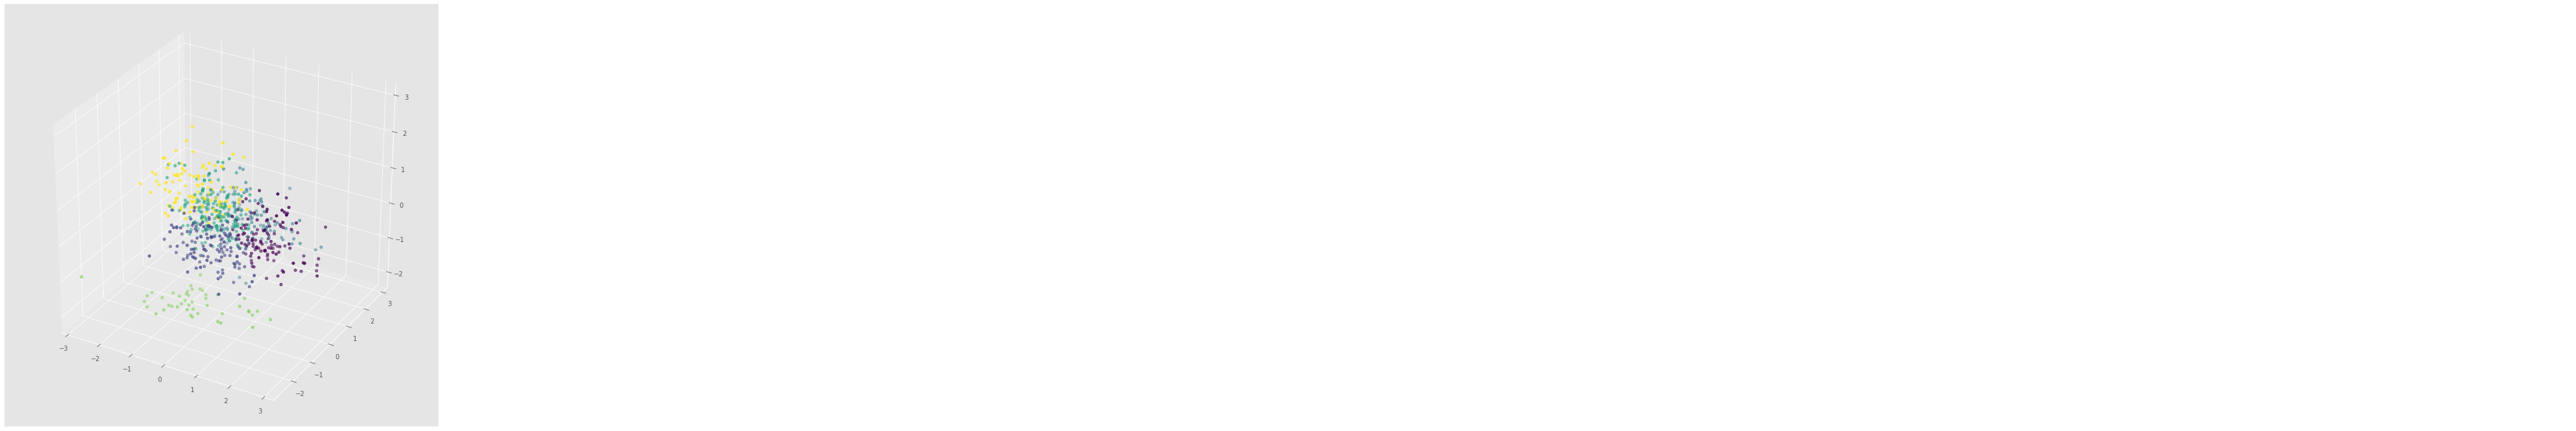

In [199]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12)) 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean['Fashion'],df_clean['Leisure'], df_clean['Stretch'] , c=cluster_labels, marker="o")
plt.savefig('fig1.png', dpi = 300)
plt.show() # DOUBLE CLICK FOR LARGE PIC